# **SISTEM PENGKLASIFIKASI JENIS TUMOR OTAK MEMANFAATKAN MACHINE LEARNING DENGAN ALGORITMA *CONVOLUTIONAL NEURAL NETWORK (CNN)***

 Pada kasus ini, kami menggunakan dataset tentang klasifikasi jenis tumor otak yang diambil dari kaggle. Berikut link nya https://www.kaggle.com/datasets/denizkavi1/brain-tumor


# **IMPORT LIBRARY**
Disini kami mengimport beberapa library yang kami butuhkan untuk menyelesaikan permasalahan kasus yang kami pilih. Seperti, splitfolders, tensorflow, matplotlib, dan lain-lain.

In [1]:
from google.colab import drive
from google.colab import files
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

!pip install split-folders
import splitfolders

# **LOAD DATA**
Proses load data merupakan proses untuk peng-*upload*-an dataset sesuai dengan contoh kasus. Dataset contoh kasus ini, kami ambil dari kaggle, berikut link nya : https://www.kaggle.com/datasets/denizkavi1/brain-tumor .
Proses peng-*upload*-an data set yang kami pilih melalui drive. Maka colab dan drive harus dihubungkan terlebih dahulu

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Setelah berhasil terhubung ke drive, proses selanjutnya adalah mengekstrak dataset yang telah di download karena dataset yang kami download berupa folder zip. Kemudian maka kami tempatkan folder hasil ekstrak di dalam 'content/braintumor'

In [3]:
local_zip = '/content/drive/MyDrive/DATASET/tumorbrain.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/braintumor')
zip_ref.close()

Kemudian pada proses ini adalah membagi data yang akan di jadikan sebagai data training dan data validation, kemudian meletakkannya kedalam folder yang telah ditentukan. Disini untuk perbandingan data training dan data validation nya adalah 60% : 40%.

In [4]:
base_dir = '/content/braintumor'
splitfolders.ratio(base_dir, output='/content/braintumor', seed=1337,ratio=(.6,.4))
train_dir = os.path.join('/content/braintumor', 'train')
validation_dir = os.path.join('/content/braintumor','val')

Copying files: 3064 files [00:03, 946.68 files/s]


**CATATAN**

jika koneksi ke drive masih terhubung, namun koneksi sesama blok program terputus, maka jangan jalankan dari atas. Cukup jalankan blok program peng-*import*-an dan blok program ini agar tidak membuat file ektrak baru.

In [5]:
train_dir = '/content/braintumor/train'
validation_dir = '/content/braintumor/val'

Selanjutnya, kami akan menampilkan list folder apa saja yang ada didalam setiap direktori train maupun val, berikut hasilnya

In [6]:
os.listdir('/content/braintumor/train')

['1', '2', '3']

In [7]:
os.listdir('/content/braintumor/val')

['1', '2', '3']

# **PREPROCESSING DATA DAN AUGMENTASI DATA**

Langkah selanjutnya adalah menerapkan ImageDataGenerator. ImageDataGenerator berperan untuk mempersiapkan data training, dan data validation. Selain itu, ImageDataGenerator berfungsi untuk preprocessing data, pelabelan sample otomatis, dan augmentasi gambar.


Setelah menerapkan ImageDataGenerator, maka selanjutnya adalah siapkan data training dan data validation dari kumpulan data gambar yang di-*load* dalam memori melalui fungsi flow(). Pada proses ini class_mode yang digunakan adalah "categorical" karena jenis data yang kami miliki adalah 'multiclass classification'

In [8]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255 )

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=4,
            class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=4,
            class_mode='categorical')

Found 1837 images belonging to 3 classes.
Found 1227 images belonging to 3 classes.


# **PEMBUATAN ARSITEKTUR MODEL MENGGUNAKAN ALGORITMA CONVOLUTIONAL NEURAL NETWORK (CNN)**

Setelah data siap, maka kami melakukan pembuatan model dengan menggunakan algoritma Convolutional Neural Network (CNN). Disini terdapat 4 lapis layer konvolusi dan max pooling.

Fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan model lebih cepat.

In [13]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=64,
                              kernel_size= 3,
                              activation="relu",
                              input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding="valid"),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                 

Setelah membuat arsitektur model CNN, tahap selanjutnya adalah melakukan compile model tersebut menggunakan fungsi compile(). Pada tahap ini, kami juga menentukan loss function serta optimizer yang akan digunakan. Loss function yang digunakan pada kasus klasifikasi muticlass adalah "categorical_crossentropy". Sedangkan optimizer yang digunakan adalah adam.

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training= True
callbacks=myCallback()

# **MODEL TESTING**

Setelah proses pembuatan model selesai, maka proses selanjutnya adalah testing. Proses model testing yang kami jalankan menggunakan epoch sebanyak 30 kali.

Tahap terakhir dalam pembuatan model adalah proses model fitting. Pada proses ini, kita memasukkan data latih pada jaringan Neural Network yang telah kita buat sebelumnya. Berikut hasilnya

In [16]:
h= model.fit(train_generator,
              epochs=30,
             callbacks=[callbacks],
              steps_per_epoch=len(train_generator))

Epoch 1/30
460/460 [==============================] - 42s 81ms/step - loss: 0.7875 - accuracy: 0.6554
Epoch 2/30
460/460 [==============================] - 40s 87ms/step - loss: 0.5732 - accuracy: 0.7452
Epoch 3/30
460/460 [==============================] - 37s 80ms/step - loss: 0.4757 - accuracy: 0.7937
Epoch 4/30
460/460 [==============================] - 37s 80ms/step - loss: 0.4105 - accuracy: 0.8269
Epoch 5/30
460/460 [==============================] - 38s 83ms/step - loss: 0.3746 - accuracy: 0.8400
Epoch 6/30
460/460 [==============================] - 37s 80ms/step - loss: 0.3063 - accuracy: 0.8672
Epoch 7/30
460/460 [==============================] - 36s 78ms/step - loss: 0.2958 - accuracy: 0.8813
Epoch 8/30
460/460 [==============================] - 39s 84ms/step - loss: 0.2657 - accuracy: 0.8949
Epoch 9/30
460/460 [==============================] - 36s 79ms/step - loss: 0.2440 - accuracy: 0.9069
Epoch 10/30
460/460 [==============================] - 36s 79ms/step - loss: 0.227

# **MODEL EVALUATION**

Dengan melakukan evaluasi ini, kita dapat memperoleh informasi tentang kinerja model CNN pada data validasi, seperti tingkat loss dan akurasi pada data yang tidak digunakan selama proses pelatihan.

tahap selanjutnya yang menjadi pilihan adalah, membuat grafik tingkat keakutasian dan kesalahan dari model yang telah dilatih. Pembuatan grafik ini menggunakan library matplotlib. Berikut 2 tampilan gambar grafik dari Accuracy Plot dan Loss Plot

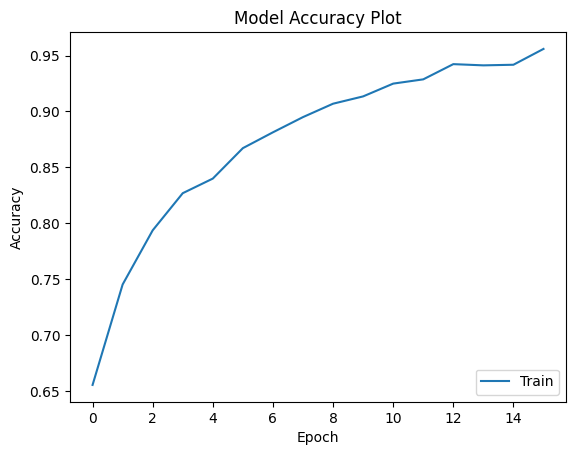

In [18]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

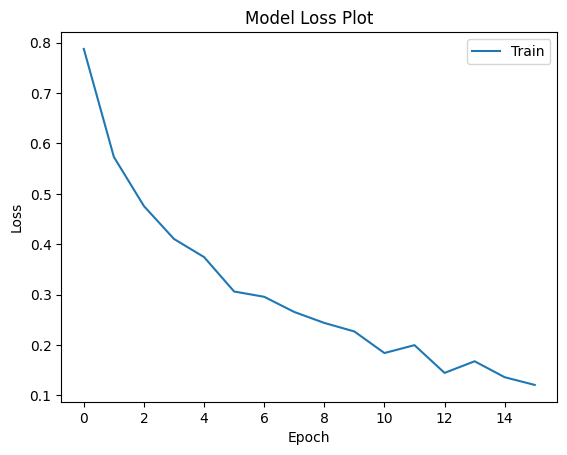

In [19]:
plt.plot(h.history['loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

# **PENGAPLIKASIAN**

Agar sistem ini dapat dipergunakan, maka kami menambahkan tombol untuk mengupload gambar hasil scan MRI yang dilakukan. Berikut hasil percobaan yang kami lakukan dengan gambar dari dataset ini. Gambar kami pilih secara random.

Saving 457.png to 457.png
1/1 [==============================] - 0s 110ms/step
457.png


		 SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS MENINGIOMA DALAM HASIL MRI


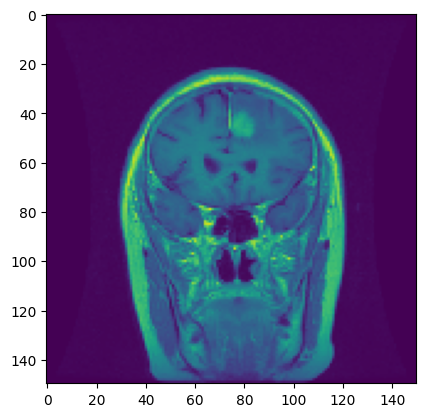

In [20]:
uploaded = files.upload()

for fn in uploaded.keys():
      path = fn
      img = image.load_img(path, target_size=(150,150))

      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      images = np.vstack([x])

      classes = model.predict(images, batch_size=10)
      print(fn)
      if classes[0,0]!=0:
       print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS MENINGIOMA DALAM HASIL MRI')
      elif classes[0,1]!=0:
       print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS GLIOMA DALAM HASIL MRI')
      elif classes[0,2]!=0:
        print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS PITUITARY DALAM HASIL MRI')


In [21]:
model.save('tumor-brain.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
